In [20]:
import numpy as np
from nn import NeuralNetwork
from loss import MSE
from activation import ReLU, Sigmoid
from layer import Layer

from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST


layers = [Layer(1, 4, 
          ReLU()), 
          Layer(4, 5, 
          ReLU()),
          Layer(5, 6, 
          ReLU()),
          Layer(6, 7, 
          ReLU()),
          Layer(7, 2, 
          ReLU())]

x = np.random.random((784, 1))

layers = [Layer(784, 32, 
          ReLU()), 
          Layer(32, 784, 
          Sigmoid())]

nn_my = NeuralNetwork(layers)
mse = MSE(nn_my)
l2 = mse(x, x)
pred = nn_my(x)
print(nn_my)
mse.backward()

NeuralNetwork(
   Layer 0: (784, 32) 
   Layer 1: (32, 784) 
)


In [21]:
import torch.nn as nn

class NNT(nn.Module):


    def __init__(self):
        super(NNT, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 32),
            nn.ReLU(),
            nn.Linear(32, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        activations = []
        for layer in self.model:
            x = layer(x)
            activations.append(x.clone())
        return x, activations

    def forward_original(self, x):
        return self.model(x)

from torch import optim
nnt = NNT()
opt = optim.SGD(nnt.parameters(), lr=0.05)
loss_t = nn.MSELoss()

In [22]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = MNIST(root='data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

In [23]:
def optimizer(nn):
    for layer in nn.layers:
        layer.W -= 0.000000005 * layer.grad_local.T
        layer.b -= 0.000000005 * layer.delta

In [24]:
def zero_grad(nn):
    for layer in nn.layers:
        layer.grad_local = 0
        layer.delta = 0

In [25]:
x, y = next(iter(train_loader))
a = x.reshape((784, -1)).numpy()
a.shape

(784, 1)

In [7]:
EPOCHS = 10000
LOSS_T = []
LOSS = []
import torch
for i in range(EPOCHS):
    #for data in train_loader:
    #x, _ = data
    #x = x.reshape((784, -1)).numpy()
    pred = nn_my(a)
    loss = mse(pred, a)
    LOSS.append(loss)
    mse.backward()
    optimizer(nn_my)
    zero_grad(nn_my)
    ## torch
    x = x.reshape((-1, 784))
    x = torch.asarray(x)
    pred_t, activations = nnt(x)
    loss = loss_t(pred_t, x)
    LOSS_T.append(loss)
    loss.backward()
    opt.step()
    opt.zero_grad()

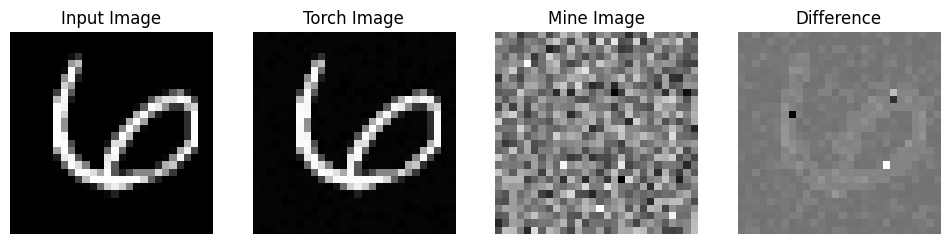

In [8]:
import matplotlib.pyplot as plt
import torch

input_image_tensor = a.reshape(1, 1, 28, 28)   # torch.Tensor
torch_image_tensor = pred_t.detach().reshape(1, 1, 28, 28)  # torch.Tensor
mine_image_tensor = pred.reshape(1, 1, 28, 28) # numpy.ndarray


input_image_np = input_image_tensor.squeeze()  # Remove singleton dimensions
torch_image_np = torch_image_tensor.squeeze().numpy()
mine_image_np = mine_image_tensor.squeeze()
diff = input_image_np - torch_image_np

fig, axes = plt.subplots(1, 4, figsize=(12, 4))

axes[0].imshow(input_image_np, cmap='gray')  # Use 'gray' colormap for grayscale images
axes[0].set_title('Input Image')
axes[0].axis('off')

axes[1].imshow(torch_image_np, cmap='gray')
axes[1].set_title('Torch Image')
axes[1].axis('off')

axes[2].imshow(mine_image_np, cmap='gray')
axes[2].set_title('Mine Image')
axes[2].axis('off')

axes[3].imshow(diff, cmap='gray')
axes[3].set_title('Difference')
axes[3].axis('off')
plt.show()

In [ ]:
import numpy as np

random_array = np.random.uniform(low=-1, high=1, size=(3, 4))
print(random_array)

In [ ]:
numpy_array = np.random.randn(3, 3) * np.sqrt(2.0 / (3 + 3))  
numpy_array

In [ ]:
torch.nn.Linear(3,3).weight.data

In [ ]:
torch.nn.Linear(3,3).bias.data

In [ ]:
import matplotlib.pyplot as plt

plt.plot(LOSS, label='Loss')
plt.xlabel('Batch Iterations')
plt.ylabel('Loss')
plt.title('Loss Over Batch Iterations')
plt.legend()
plt.show()

In [ ]:
print(nn)

In [ ]:
for l, layer in enumerate(nn_my.layers):
    print(f'l= {l}')
    print(f'x shape {layer.x.shape}')
    print(f'W shape {layer.W.shape}')
    print(f'W.T @, x.shape {(layer.W.T.shape, layer.x.shape)} = {(layer.W.T @ layer.x).shape}')
    print(f'B shape {layer.b.shape}')
    print(f'a shape {layer.a.shape}')
    print(f'z shape {layer.z.shape}')
    print(f'GRADS')
    print(f'local {layer.grad_local.shape}')
    print(f'delta {layer.delta.shape}\n')
